## Final Project Submission

Please fill out:
* Student name: Benjamin Toler
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [227]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [334]:
#import data
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df2 = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
df3 = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
df4 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df5 = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
df6 = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df7 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df8 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
df9 = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', 
                  encoding= 'unicode_escape')
df10 = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
df11 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]

# Data Exploration

In [335]:
#preview datasets
for index in range(len(dfs)):
    print("df",index+1)
    display(dfs[index].head(2))

df 1


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


df 2


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


df 3


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


df 4


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


df 5


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


df 6


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN


df 7


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


df 8


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


df 9


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


df 10


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


df 11


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


We will combine datasets 2, 3, 4, 5, 7 from IMBD and select for areas of interests
including genre, runtime, rating, and director

In [336]:
df3.head(5)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


As Mirosoft is an American company it makes sense to explore only movies made
in the US, as these will give the most accurate expectations for Microsoft. Additionally, by examining df3, we see that many of the title_ids are repeated. We only need one instance of each movie for analysis so we will remove these duplicates. Lastly we will select only the title_id and title from the dataset.

In [337]:
#select only US films
df3 = df3[df3.region == 'US']
#check that we only have US films
df3.region.unique()

array(['US'], dtype=object)

In [338]:
df3.drop_duplicates(subset='title_id', inplace=True)

<ipython-input-338-9609a98a78bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(subset='title_id', inplace=True)


In [339]:
df3 = df3[['title_id', 'title']]

In [340]:
#check if the previous code worked
print(max(df3.title_id.value_counts()))
df3.head(5)

1


,title_id,title
12,tt0369610,Jurassic World 3D
50,tt0401729,John Carter of Mars
109,tt1014759,Alice in Wonderland: An IMAX 3D Experience
152,tt10379338,Guys Night Out
157,tt10446418,The Icon


Now that we have the date we want from df3 will join datsets 3 and 4 using the common title_id/tconst. Furthermore we are only interested in joining runtime and genres from df4.

In [341]:
#reset index of df4 to tconst
df4.set_index('tconst', inplace=True)

In [342]:
#join df3 with df4
df3_4 = df3.join(df4[['start_year', 'runtime_minutes', 'genres']], how='inner', on='title_id')
print(df3_4.shape)
df3_4.head()

(47433, 5)


,title_id,title,start_year,runtime_minutes,genres
12,tt0369610,Jurassic World 3D,2015,124.0,"Action,Adventure,Sci-Fi"
50,tt0401729,John Carter of Mars,2012,132.0,"Action,Adventure,Sci-Fi"
109,tt1014759,Alice in Wonderland: An IMAX 3D Experience,2010,108.0,"Adventure,Family,Fantasy"
152,tt10379338,Guys Night Out,2019,NaN,Comedy
157,tt10446418,The Icon,2011,215.0,"Documentary,History"


Now we will join df 7 to our joined df3_4, again using tconst

In [343]:
df7.set_index('tconst', inplace=True)

In [344]:
df3_4_7 = df3_4.join(df7, how='left', on='title_id')
print(df3_4_7.shape)
df3_4_7.head(5)

(47433, 7)


,title_id,title,start_year,runtime_minutes,genres,averagerating,numvotes
12,tt0369610,Jurassic World 3D,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
50,tt0401729,John Carter of Mars,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792.0
109,tt1014759,Alice in Wonderland: An IMAX 3D Experience,2010,108.0,"Adventure,Family,Fantasy",6.5,358813.0
152,tt10379338,Guys Night Out,2019,NaN,Comedy,NaN,NaN
157,tt10446418,The Icon,2011,215.0,"Documentary,History",NaN,NaN


Next we join the directors column from df5

In [345]:
df5.set_index('tconst', inplace=True)

In [346]:
df3_4_7_5 = df3_4_7.join(df5['directors'], how='left', on='title_id')
print(df3_4_7_5.shape)
df3_4_7_5.head(5)

(47433, 8)


,title_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,directors
12,tt0369610,Jurassic World 3D,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,nm1119880
50,tt0401729,John Carter of Mars,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792.0,nm0004056
109,tt1014759,Alice in Wonderland: An IMAX 3D Experience,2010,108.0,"Adventure,Family,Fantasy",6.5,358813.0,nm0000318
152,tt10379338,Guys Night Out,2019,NaN,Comedy,NaN,NaN,nm2584377
157,tt10446418,The Icon,2011,215.0,"Documentary,History",NaN,NaN,nm4270970


We need to replace the person_ids in the directors column with their actual names, so we will join this dataset with df2 using the nconst and directors as a common link. We only need primary name form df2

In [347]:
df2.set_index('nconst', inplace=True)

In [348]:
imbd_df = df3_4_7_5.join(df2['primary_name'], how='left', on='directors')
# we can then drop the director id column, and change the primary_name column
# to director
imbd_df.drop('directors', axis=1, inplace=True)
imbd_df.rename(columns={'primary_name': 'director'}, inplace=True)
print(imbd_df.shape)
imbd_df.head(5)

(47433, 8)


,title_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,director
12,tt0369610,Jurassic World 3D,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Colin Trevorrow
50,tt0401729,John Carter of Mars,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792.0,Andrew Stanton
109,tt1014759,Alice in Wonderland: An IMAX 3D Experience,2010,108.0,"Adventure,Family,Fantasy",6.5,358813.0,Tim Burton
152,tt10379338,Guys Night Out,2019,NaN,Comedy,NaN,NaN,Arthur Muhammad
157,tt10446418,The Icon,2011,215.0,"Documentary,History",NaN,NaN,Nenad Ilic


Now we will join the imbd_df with df1 which includes data about how much the movie makes

In [349]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [350]:
df1['foreign_gross'] = df1['foreign_gross'].map(lambda x: float(x.replace(',', '').replace('.',''))
                         if type(x) == str else float(0))

In [351]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [352]:
movie_df = imbd_df.merge(df1, how='inner', left_on=['title', 'start_year'],
                        right_on=['title', 'year'])
movie_df.drop(['studio', 'start_year'], axis=1, inplace=True)

In [353]:
movie_df['worldwide_gross'] = movie_df.domestic_gross + movie_df.foreign_gross

In [354]:
movie_df.head()

,title_id,title,runtime_minutes,genres,averagerating,numvotes,director,domestic_gross,foreign_gross,year,worldwide_gross
0,tt1223236,African Cats,89.0,"Adventure,Documentary",7.6,5784.0,NaN,15400000.0,15400000.0,2011,30800000.0
1,tt1235522,Broken City,109.0,"Crime,Drama,Thriller",6.2,71704.0,Allen Hughes,19700000.0,0.0,2013,19700000.0
2,tt1343727,Dredd,95.0,"Action,Crime,Sci-Fi",7.1,234616.0,Pete Travis,13400000.0,22200000.0,2012,35600000.0
3,tt1401152,Unknown,113.0,"Action,Mystery,Thriller",6.9,235167.0,Jaume Collet-Serra,63700000.0,67099999.0,2011,130799999.0
4,tt1413496,Revenge of the Electric Car,90.0,Documentary,7.2,1692.0,Chris Paine,151000.0,0.0,2011,151000.0


In [355]:
df11['year'] = df11.release_date.map(lambda x: int(x[-4:]))
df11['month'] = df11.release_date.map(lambda x: x[:3])
df11['domestic_gross'] = df11.domestic_gross.map(lambda x: float(x.replace('$','').replace(',','')))
df11['production_budget'] = df11.production_budget.map(lambda x: float(x.replace('$','').replace(',','')))
df11['worldwide_gross'] = df11.worldwide_gross.map(lambda x: float(x.replace('$','').replace(',','')))

In [356]:
df11.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,Dec


In [357]:
movie2_df = imbd_df.merge(df11, how='inner', left_on=['title', 'start_year'],
                        right_on=['movie', 'year'])

In [358]:
movie2_df.drop(['start_year', 'id', 'release_date', 'movie'], axis=1, inplace=True)

In [359]:
movie2_df

,title_id,title,runtime_minutes,genres,averagerating,numvotes,director,production_budget,domestic_gross,worldwide_gross,year,month
0,tt1235522,Broken City,109.0,"Crime,Drama,Thriller",6.2,71704.0,Allen Hughes,35000000.0,19701164.0,34480045.0,2013,Jan
1,tt1343092,The Great Gatsby,143.0,"Drama,Romance",7.3,433165.0,Baz Luhrmann,190000000.0,144840419.0,351040419.0,2013,May
2,tt1343727,Dredd,95.0,"Action,Crime,Sci-Fi",7.1,234616.0,Pete Travis,45000000.0,13414714.0,41467606.0,2012,Sep
3,tt1401152,Unknown,113.0,"Action,Mystery,Thriller",6.9,235167.0,Jaume Collet-Serra,40000000.0,63686397.0,136123083.0,2011,Feb
4,tt1604171,Prom,104.0,"Comedy,Drama,Family",5.4,14279.0,Joe Nussbaum,8000000.0,10130219.0,10763183.0,2011,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...
1006,tt3348730,Jigsaw,92.0,"Crime,Horror,Mystery",5.8,57184.0,NaN,10000000.0,38052832.0,102445196.0,2017,Oct
1007,tt4651520,Bad Moms,100.0,Comedy,6.2,100952.0,NaN,20000000.0,113257297.0,180998716.0,2016,Jul
1008,tt5442430,Life,104.0,"Horror,Sci-Fi,Thriller",6.6,182840.0,Daniel Espinosa,58000000.0,30234022.0,100929666.0,2017,Mar
1009,tt5462602,The Big Sick,120.0,"Comedy,Drama,Romance",7.6,104008.0,Michael Showalter,5000000.0,42872467.0,53972860.0,2017,Jun


In [360]:
joined_movies = movie_df.merge(movie2_df[['title', 'production_budget', 'year', 'month']]
                                          ,how='inner', 
                               left_on=['title','year'], 
                               right_on=['title', 'year'])
joined_movies

,title_id,title,runtime_minutes,genres,averagerating,numvotes,director,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,month
0,tt1235522,Broken City,109.0,"Crime,Drama,Thriller",6.2,71704.0,Allen Hughes,19700000.0,0.0,2013,19700000.0,35000000.0,Jan
1,tt1343727,Dredd,95.0,"Action,Crime,Sci-Fi",7.1,234616.0,Pete Travis,13400000.0,22200000.0,2012,35600000.0,45000000.0,Sep
2,tt1401152,Unknown,113.0,"Action,Mystery,Thriller",6.9,235167.0,Jaume Collet-Serra,63700000.0,67099999.0,2011,130799999.0,40000000.0,Feb
3,tt1604171,Prom,104.0,"Comedy,Drama,Family",5.4,14279.0,Joe Nussbaum,10100000.0,0.0,2011,10100000.0,8000000.0,Apr
4,tt1860357,Deepwater Horizon,107.0,"Action,Drama,History",7.1,133303.0,Peter Berg,61400000.0,60400000.0,2016,121800000.0,156000000.0,Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,tt7137380,Destroyer,121.0,"Action,Crime,Drama",6.2,13683.0,Karyn Kusama,1500000.0,4000000.0,2018,5500000.0,9000000.0,Dec
685,tt5117670,Peter Rabbit,95.0,"Adventure,Animation,Comedy",6.6,27908.0,Will Gluck,115300000.0,236000000.0,2018,351300000.0,50000000.0,Feb
686,tt3348730,Jigsaw,92.0,"Crime,Horror,Mystery",5.8,57184.0,NaN,38100000.0,64900000.0,2017,103000000.0,10000000.0,Oct
687,tt4651520,Bad Moms,100.0,Comedy,6.2,100952.0,NaN,113300000.0,70700000.0,2016,184000000.0,20000000.0,Jul


In [372]:
total_df = pd.concat([joined_movies, movie_df, movie2_df])

In [373]:
total_df.drop_duplicates('title', keep='first', inplace=True)

In [374]:
total_df.shape

(1315, 13)

In [375]:
total_df['worldwide_net_profit'] = total_df.worldwide_gross - total_df.production_budget

In [376]:
total_df.head()

,title_id,title,runtime_minutes,genres,averagerating,numvotes,director,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,month,worldwide_net_profit
0,tt1235522,Broken City,109.0,"Crime,Drama,Thriller",6.2,71704.0,Allen Hughes,19700000.0,0.0,2013,19700000.0,35000000.0,Jan,-15300000.0
1,tt1343727,Dredd,95.0,"Action,Crime,Sci-Fi",7.1,234616.0,Pete Travis,13400000.0,22200000.0,2012,35600000.0,45000000.0,Sep,-9400000.0
2,tt1401152,Unknown,113.0,"Action,Mystery,Thriller",6.9,235167.0,Jaume Collet-Serra,63700000.0,67099999.0,2011,130799999.0,40000000.0,Feb,90799999.0
3,tt1604171,Prom,104.0,"Comedy,Drama,Family",5.4,14279.0,Joe Nussbaum,10100000.0,0.0,2011,10100000.0,8000000.0,Apr,2100000.0
4,tt1860357,Deepwater Horizon,107.0,"Action,Drama,History",7.1,133303.0,Peter Berg,61400000.0,60400000.0,2016,121800000.0,156000000.0,Sep,-34200000.0


In [435]:
grouped = total_df.groupby('month').mean()
grouped

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,worldwide_net_profit
month,,,,,,,,,
Apr,105.125000,6.200000,93676.276923,6.142998e+07,4.728436e+07,2013.590909,1.143500e+08,3.825606e+07,7.609396e+07
Aug,104.602273,6.179545,85417.159091,4.013300e+07,5.044852e+07,2013.920455,8.436752e+07,3.332511e+07,5.104241e+07
Dec,109.283582,6.238806,118963.268657,5.347405e+07,1.194231e+08,2013.855072,1.283178e+08,3.974293e+07,8.857485e+07
Feb,107.656250,6.125397,122905.206349,6.300403e+07,8.129882e+07,2014.400000,1.350676e+08,4.677908e+07,8.828857e+07
Jan,105.673469,5.764583,73540.291667,3.762524e+07,3.544728e+07,2014.081633,7.073033e+07,3.363933e+07,3.709100e+07
Jul,103.694444,6.280282,131129.323944,6.384544e+07,1.400874e+08,2013.684932,1.705880e+08,5.139767e+07,1.191903e+08
Jun,105.855263,6.394737,131467.065789,8.332657e+07,1.499403e+08,2014.324675,2.009626e+08,5.971158e+07,1.412510e+08
Mar,104.653846,6.174026,104220.207792,6.920801e+07,8.122851e+07,2014.564103,1.682341e+08,5.225692e+07,1.159772e+08
May,106.765625,6.109375,138140.015625,6.923342e+07,1.310081e+08,2014.203125,1.792686e+08,6.055234e+07,1.187162e+08


In [436]:
order = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]

In [437]:
grouped.reset_index(inplace=True)

In [438]:
grouped.index = order

In [439]:
grouped.sort_index(inplace=True)

In [440]:
grouped.set_index('month', inplace=True)

In [441]:
grouped

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,worldwide_net_profit
month,,,,,,,,,
Jan,105.673469,5.764583,73540.291667,3.762524e+07,3.544728e+07,2014.081633,7.073033e+07,3.363933e+07,3.709100e+07
Feb,107.656250,6.125397,122905.206349,6.300403e+07,8.129882e+07,2014.400000,1.350676e+08,4.677908e+07,8.828857e+07
Mar,104.653846,6.174026,104220.207792,6.920801e+07,8.122851e+07,2014.564103,1.682341e+08,5.225692e+07,1.159772e+08
Apr,105.125000,6.200000,93676.276923,6.142998e+07,4.728436e+07,2013.590909,1.143500e+08,3.825606e+07,7.609396e+07
May,106.765625,6.109375,138140.015625,6.923342e+07,1.310081e+08,2014.203125,1.792686e+08,6.055234e+07,1.187162e+08
Jun,105.855263,6.394737,131467.065789,8.332657e+07,1.499403e+08,2014.324675,2.009626e+08,5.971158e+07,1.412510e+08
Jul,103.694444,6.280282,131129.323944,6.384544e+07,1.400874e+08,2013.684932,1.705880e+08,5.139767e+07,1.191903e+08
Aug,104.602273,6.179545,85417.159091,4.013300e+07,5.044852e+07,2013.920455,8.436752e+07,3.332511e+07,5.104241e+07
Sep,105.724490,6.393814,99748.154639,2.946988e+07,3.583283e+07,2013.850000,5.965336e+07,2.563090e+07,3.402246e+07


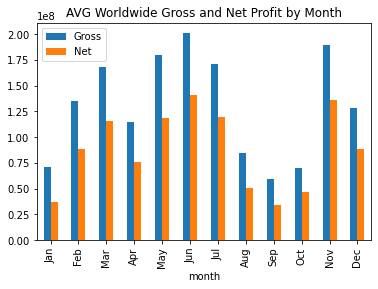

In [442]:
ax = grouped.plot(kind='bar', y=['worldwide_gross','worldwide_net_profit']);
ax.set_title('AVG Worldwide Gross and Net Profit by Month');
ax.legend(['Gross', 'Net'], loc=2)